In [1]:
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import Automate as au
import PIL
from PIL import Image
import glob
import cv2

Using TensorFlow backend.


# Load Data 

In [2]:
mainDIR = os.listdir('chest_xray')
print(mainDIR)

['.DS_Store', 'test', 'train', '.ipynb_checkpoints', 'val']


In [3]:
train_folder= 'chest_xray/train/'
val_folder = 'chest_xray/val/'
test_folder = 'chest_xray/test/'

In [4]:
# train 
os.listdir(train_folder)
train_n = train_folder+'NORMAL/'
train_p = train_folder+'PNEUMONIA/'

In [10]:
# Get all the data in the directory data/validation (132 images), and reshape them
test_generator = ImageDataGenerator().flow_from_directory(
        test_folder, 
        target_size=(256, 256), batch_size= 624)

# Get all the data in the directory data/train (790 images), and reshape them
train_generator = ImageDataGenerator().flow_from_directory(
        train_folder, 
        target_size=(256, 256), batch_size=5216)

val_generator = ImageDataGenerator().flow_from_directory(
        val_folder,
        target_size =(256,256), batch_size=16)

# Create the datasets
train_images, train_labels = next(train_generator)
test_images, test_labels = next(test_generator)
val_images, val_labels = next(val_generator)

Found 624 images belonging to 2 classes.
Found 5216 images belonging to 2 classes.
Found 16 images belonging to 2 classes.


In [19]:
# check shape of images and labels
print(np.shape(train_images))
print(np.shape(train_labels))
print(np.shape(test_images))
print(np.shape(test_labels))
print(np.shape(val_images))
print(np.shape(val_labels))

(5216, 256, 256, 3)
(5216, 2)
(624, 256, 256, 3)
(624, 2)
(16, 256, 256, 3)
(16, 2)


In [14]:
# flatten the array
train_img_unrow = train_images.reshape(5216, -1).T
test_img_unrow = test_images.reshape(624, -1).T
val_img_unrow = val_images.reshape(16, -1).T
print(np.shape(train_img_unrow))
print(np.shape(test_img_unrow))
print(np.shape(val_img_unrow))

(196608, 5216)
(196608, 624)
(196608, 16)


In [16]:
train_generator.class_indices

{'NORMAL': 0, 'PNEUMONIA': 1}

In [17]:
train_labels_final = train_labels.T[[1]]

In [18]:
test_labels_final = test_labels.T[[1]]

In [7]:
# train_datagen = ImageDataGenerator(rescale = 1./255,
#                                    shear_range = 0.2,
#                                    zoom_range = 0.2,
#                                    horizontal_flip = True)

# test_datagen = ImageDataGenerator(rescale = 1./255)  #Image normalization.

# training_set = train_datagen.flow_from_directory('chest_xray/train',
#                                                  target_size = (256, 256),
#                                                  batch_size = 5216,
#                                                  class_mode = 'binary')

# validation_generator = test_datagen.flow_from_directory('chest_xray/val/',
#     target_size=(256, 256),
#     batch_size=16,
#     class_mode='binary')

# test_set = test_datagen.flow_from_directory('chest_xray/test',
#                                             target_size = (256, 256),
#                                             batch_size = 624,
#                                             class_mode = 'binary')

Found 5216 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


# Create a Dataframe for Graphs and EDA

In [2]:
# Directory path
train_data_dir = 'chest_xray/train/NORMAL/'
train_data_dir_sick = 'chest_xray/train/PNEUMONIA/'

val_data_dir = 'chest_xray/val/NORMAL/'
val_data_dir_sick = 'chest_xray/val/PNEUMONIA/'

test_data_dir = 'chest_xray/test/NORMAL/'
test_data_dir_sick = 'chest_xray/test/PNEUMONIA/'

In [9]:
# see the number of images in each folder
trainnorm_Counter = au.image_counter(train_data_dir)
trainsick_Counter = au.image_counter(train_data_dir_sick)
valnorm_Counter = au.image_counter(val_data_dir)
valsick_Counter = au.image_counter(val_data_dir_sick)
testnorm_Counter = au.image_counter(test_data_dir)
testsick_Counter = au.image_counter(test_data_dir_sick)

print(f"""Num of train normal images {trainnorm_Counter}
        Num of train sick images {trainsick_Counter}
        Num of val normal images {valnorm_Counter}
        Num of val sick images {valsick_Counter}
        Num of test normal images {testnorm_Counter}
        Num of test sick images {testsick_Counter}""")

Num of train normal images 1341
        Num of train sick images 3875
        Num of val normal images 8
        Num of val sick images 8
        Num of test normal images 234
        Num of test sick images 390


In [4]:
# put images into a df 1 = pneumonia 0 = normal
traindf = au.images_to_df(train_data_dir, train_data_dir_sick)
traindf.head()

,image,label
0,NORMAL2-IM-0647-0001.jpeg,0
1,person1684_bacteria_4461.jpeg,1
2,person12_bacteria_48.jpeg,1
3,person24_bacteria_109.jpeg,1
4,person721_bacteria_2623.jpeg,1


In [6]:
len(traindf)

5216

Text(0, 0.5, 'Count')

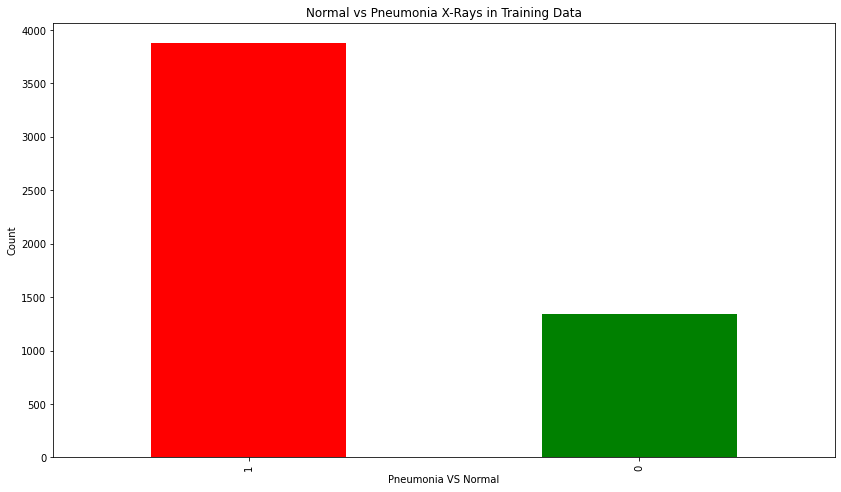

In [5]:
ax = traindf['label'].value_counts().plot(kind='bar',
                                    figsize=(14,8),
                                    title="Normal vs Pneumonia X-Rays in Training Data",
                                         color = ('red', 'green'))
ax.set_xlabel("Pneumonia VS Normal")
ax.set_ylabel("Count")

Pneumonia


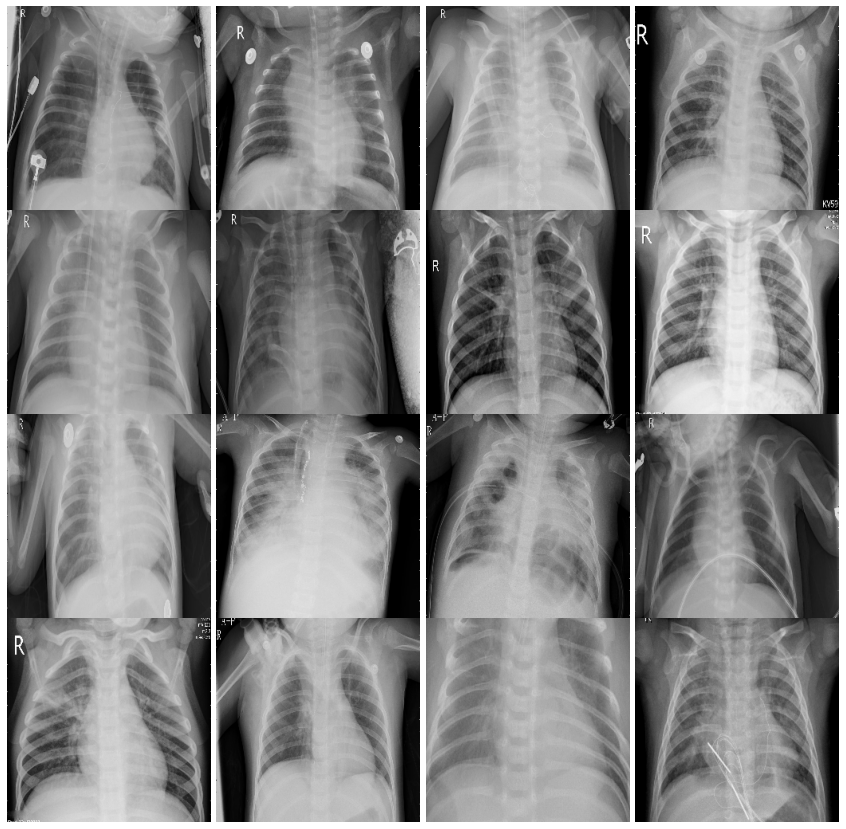

In [6]:
print("Pneumonia")
multipleImages = glob.glob('chest_xray/train/PNEUMONIA/**')
i_ = 0
plt.rcParams['figure.figsize'] = (15.0, 15.0)
plt.subplots_adjust(wspace=0, hspace=0)
for l in multipleImages[:16]:
    im = cv2.imread(l)
    im = cv2.resize(im, (256, 256)) 
    plt.subplot(4, 4, i_+1) #.set_title(l)
    plt.imshow(cv2.cvtColor(im, cv2.COLOR_BGR2RGB)); plt.axis('off')
    i_ += 1

Normal


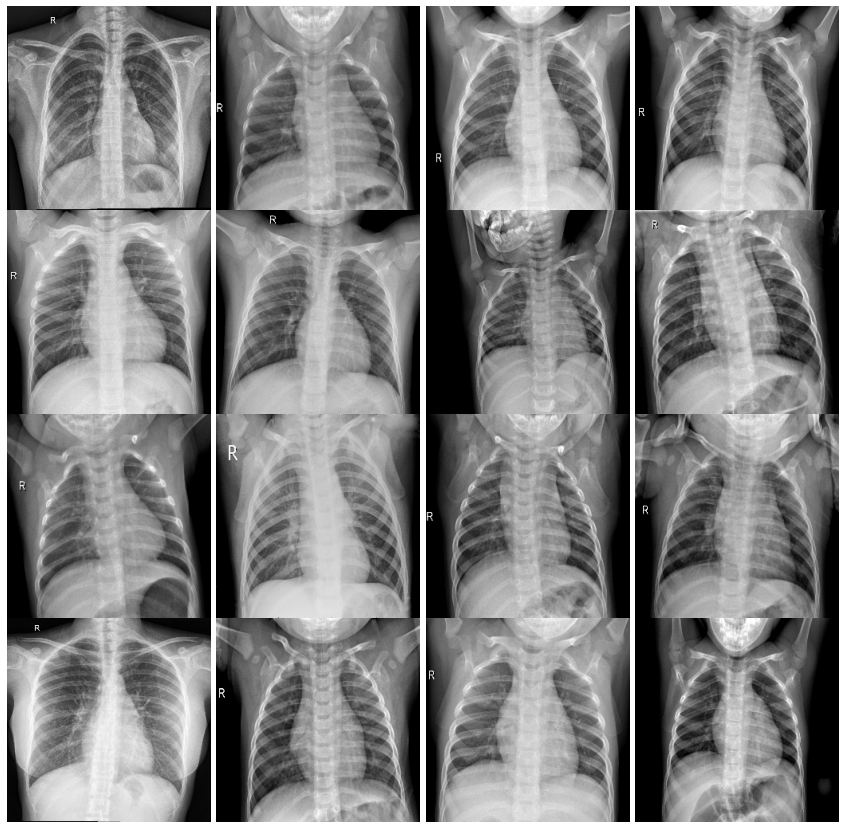

In [5]:
print("Normal")
multipleImages = glob.glob('chest_xray/train/NORMAL/**')
i_ = 0
plt.rcParams['figure.figsize'] = (15.0, 15.0)
plt.subplots_adjust(wspace=0, hspace=0)
for l in multipleImages[:16]:
    im = cv2.imread(l)
    im = cv2.resize(im, (256, 256)) 
    plt.subplot(4, 4, i_+1) #.set_title(l)
    plt.imshow(cv2.cvtColor(im, cv2.COLOR_BGR2RGB)); plt.axis('off')
    i_ += 1
